In [77]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 24 09:47:55 2021

@author: u6026797
"""
#%% libraries
import pandas as pd
import matplotlib.pyplot as plt
#%% data

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

#%% Instructions
'''
Overall instructions:
As described in the homework description, each graphic you make must:
   1. Have a thoughtful title
   2. Have clearly labelled axes 
   3. Be legible
   4. Not be a pie chart
I should be able to run your .py file and recreate the graphics without error.
As per usual, any helper variables or columns you create should be thoughtfully
named.
'''

'\nOverall instructions:\nAs described in the homework description, each graphic you make must:\n   1. Have a thoughtful title\n   2. Have clearly labelled axes \n   3. Be legible\n   4. Not be a pie chart\nI should be able to run your .py file and recreate the graphics without error.\nAs per usual, any helper variables or columns you create should be thoughtfully\nnamed.\n'

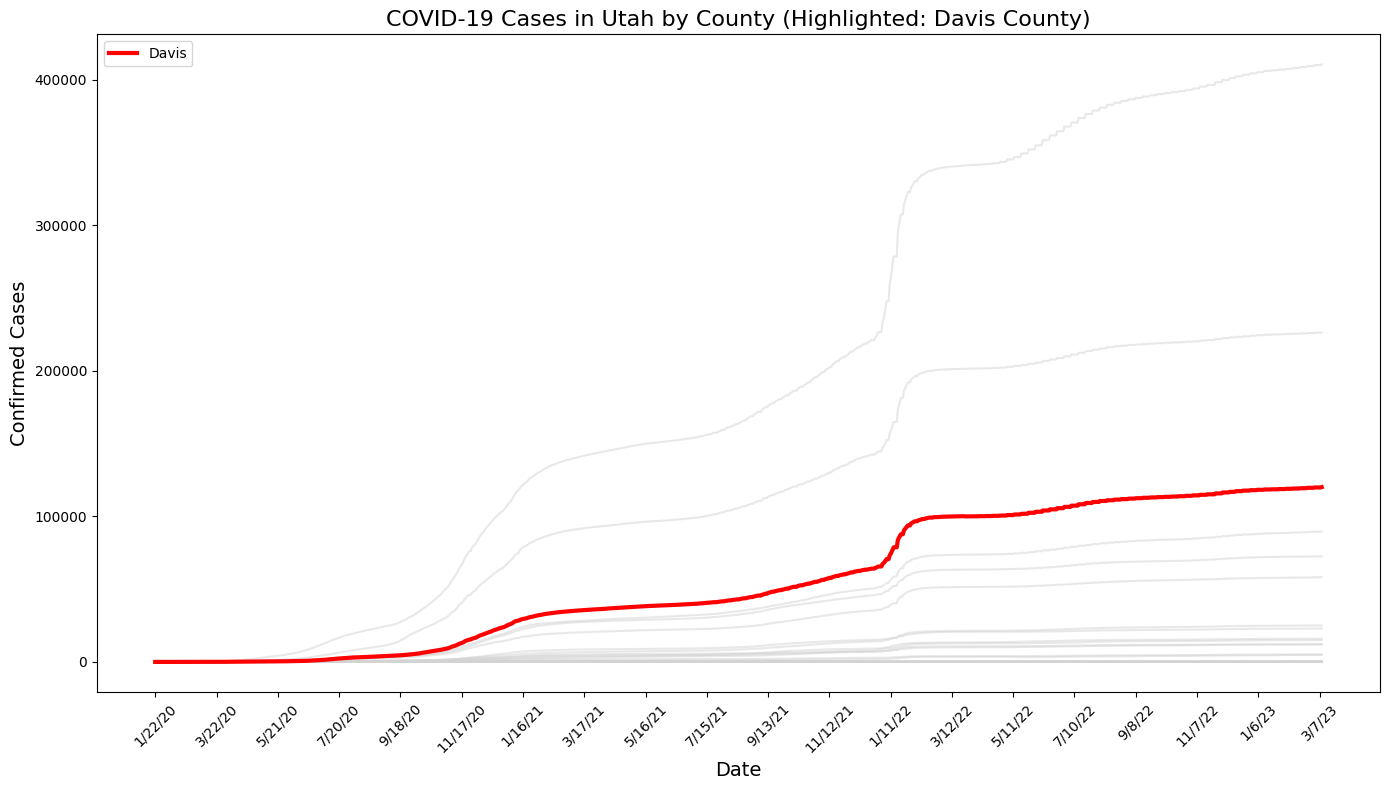

In [24]:
#%% viz 1
'''
Create a visualization that shows all of the counties in Utah as a time series,
similar to the one shown in slide 22 during the lecture. The graphic should
-Show cases over time
-Have all counties plotted in a background color (something like grey)
-Have a single county plotted in a contrasting color (something not grey)
-Have well formatted dates as the X axis
'''

utah_df = covid_df[covid_df['Province_State'] == 'Utah']                                 #Filter data to only Utah state data

date_columns = utah_df.columns[10:]                                                      #Identify the date columns

plt.figure(figsize=(14, 8))                                                              #Create a plot

for county in utah_df['Admin2'].unique():                                                #Create a loop for each Utah county
    county_data = utah_df[utah_df['Admin2'] == county][date_columns]                     #Identify the data for each Utah county
    
    county_data = county_data.fillna(0).sum(axis=0)                                      #Fill in missing data with zeros
    
    plt.plot(date_columns, county_data, color='lightgrey', alpha=0.5)                    #Plot counties lines in grey

highlight_county = 'Davis'                                                               #Identify highlighted county
highlight_data = utah_df[utah_df['Admin2'] == highlight_county][date_columns]            #Identify data for highlighted county

highlight_data = highlight_data.fillna(0).sum(axis=0)                                    #Fill in missing data for highlighted county with zeros

plt.plot(date_columns, highlight_data, color='red', label=highlight_county, linewidth=3) #Set the highlighted county color to red

plt.title('COVID-19 Cases in Utah by County (Highlighted: Davis County)', fontsize=16)   #Create the title and axes labels
plt.xlabel('Date', fontsize=14)
plt.ylabel('Confirmed Cases', fontsize=14)

tick_interval = 60                                                                       #Create data tick intervals for the x-axis
tick_positions = date_columns[::tick_interval]                                           

plt.xticks(tick_positions, rotation=45)                                                  #Set the x-ticks to these positions

plt.legend()                                                                             #Show the legend for the highlighted county

plt.tight_layout()                                                                       #Show the plot
plt.show()

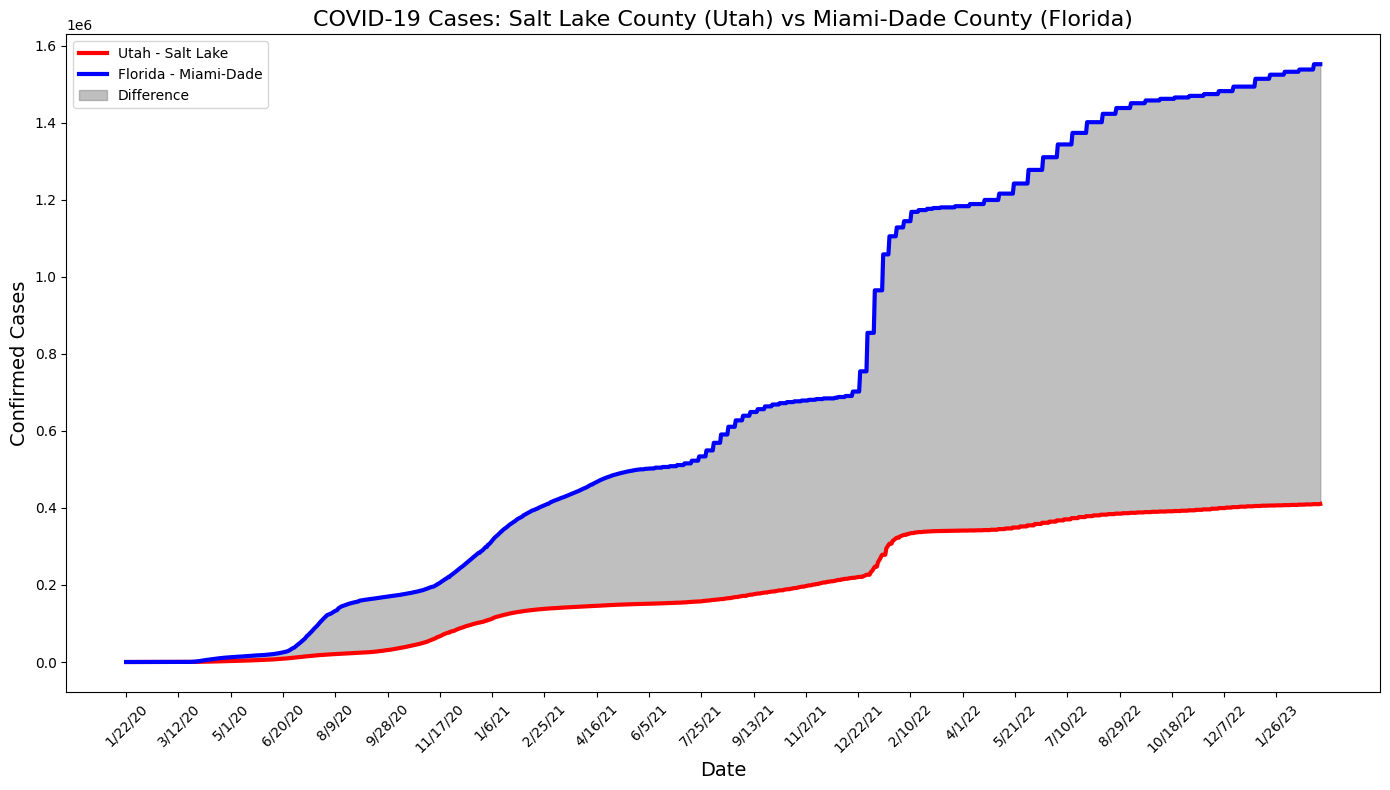

In [22]:
#%% viz 2
'''
Create a visualization that shows the contrast between the county in Utah with
the most cases to date to a county in Florida with the most cases to date.
The graphic should:
-Have only two counties plotted
-Highlight the difference between the two comparison counties
You may use any style of graphic you like as long as it is effective (dense)
and readable
'''

#Filter data for Utah and Florida
utah_df = covid_df[covid_df['Province_State'] == 'Utah']
florida_df = covid_df[covid_df['Province_State'] == 'Florida']

#Identify the columns with dates in them
date_columns = covid_df.columns[10:]

#Find the county in Utah with the most cases
utah_counties = utah_df[['Admin2'] + list(date_columns)]                                #List of Utah counties cases by date
utah_county_cases = utah_counties.set_index('Admin2').sum(axis=1)                       #Sum cases for each county
max_utah_county = utah_county_cases.idxmax()                                            #Get the county with the most cases
max_utah_data = utah_df[utah_df['Admin2'] == max_utah_county][date_columns].sum(axis=0) #Sum of cases in Utah county with most cases

#Find the county in Florida with the most cases
florida_counties = florida_df[['Admin2'] + list(date_columns)]                                      #List of Utah counties cases by date
florida_county_cases = florida_counties.set_index('Admin2').sum(axis=1)                             #Sum cases for each county
max_florida_county = florida_county_cases.idxmax()                                                  #Get the county with the most cases
max_florida_data = florida_df[florida_df['Admin2'] == max_florida_county][date_columns].sum(axis=0) #Sum of cases in Utah county with most cases

#Create a plot
plt.figure(figsize=(14, 8))

#Plot Utah county data in red
plt.plot(date_columns, max_utah_data, color='red', label=f'Utah - {max_utah_county}', linewidth=3)

#Plot Florida county data in blue
plt.plot(date_columns, max_florida_data, color='blue', label=f'Florida - {max_florida_county}', linewidth=3)

#Highlighting the difference in gray
plt.fill_between(date_columns, max_utah_data, max_florida_data, color='gray', alpha=0.5, label='Difference')

#Formatting the plot wiht title and labels
plt.title(f'COVID-19 Cases: {max_utah_county} County (Utah) vs {max_florida_county} County (Florida)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Confirmed Cases', fontsize=14)

#Create ticks for the x-axis to show dates with clarity
tick_interval = 60                                                                      
tick_positions = date_columns[::tick_interval]                                           
plt.xticks(tick_positions, rotation=45)

#Show legend
plt.legend()

#Show the plot
plt.tight_layout()
plt.show()

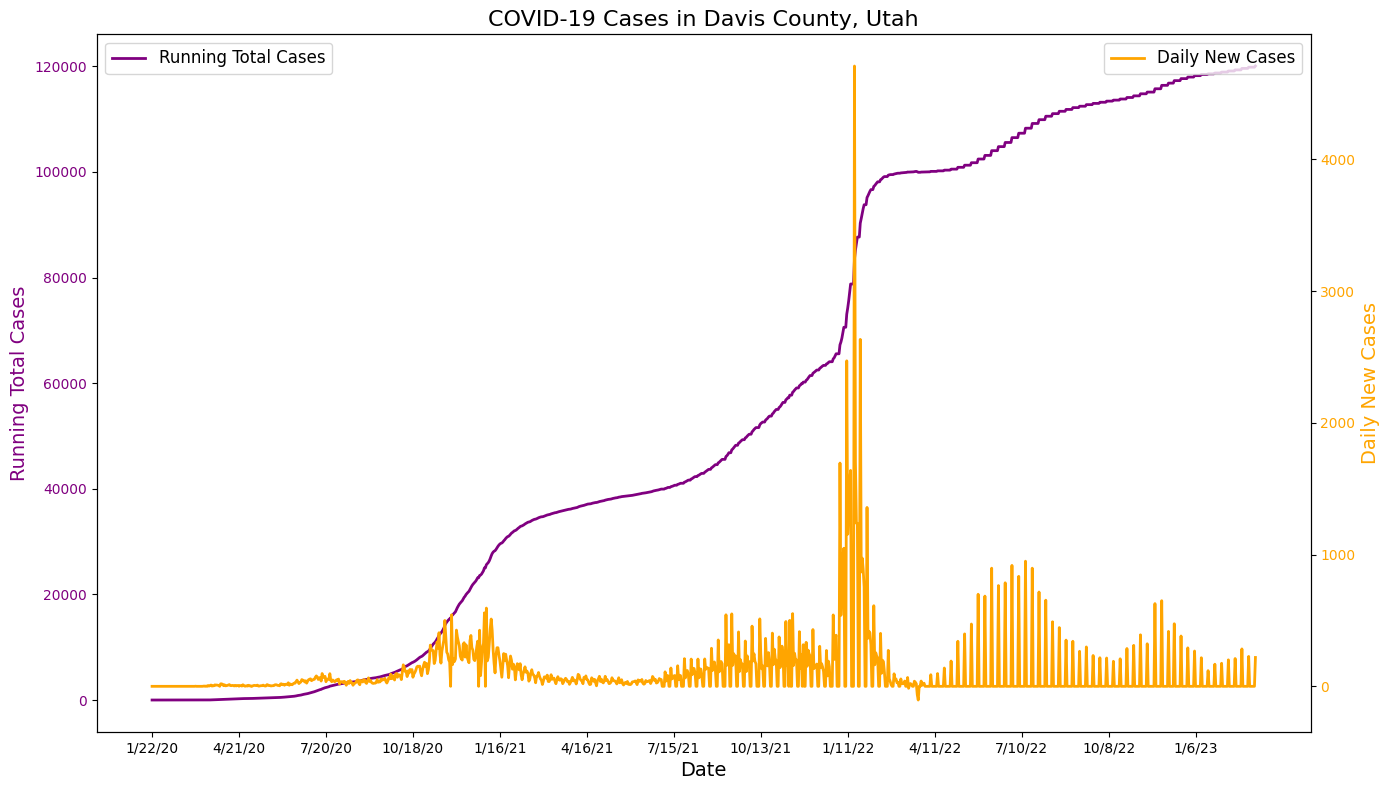

In [49]:
#%% viz 3
'''
Create a visualization that shows BOTH the running total of cases for a single
county AND the daily new cases. The graphic should:
-Use two y-axes 
-Use color to contrast the two series being plotted
-Have well formatted dates as the X axis
'''

#Filter for a specific county
county_name = 'Davis'
county_df = covid_df[(covid_df['Province_State'] == 'Utah') & (covid_df['Admin2'] == county_name)]

#Identify the date columns
date_columns = covid_df.columns[10:]

#Extract the relevant time series data for the selected county
county_cases = county_df[date_columns].iloc[0]

#Calculate daily new cases by finding the difference between consecutive days. Fill NaN values with 0 for the first day
daily_new_cases = county_cases.diff().fillna(0)  

#Calculate the running total starting with the first day's cases
running_total_cases = county_cases.iloc[0] + daily_new_cases.cumsum()

#Create a figure
fig, ax1 = plt.subplots(figsize=(14, 8))

#Plot the running total cases on the first y-axis (left axis)
ax1.plot(date_columns, running_total_cases, color='purple', label='Running Total Cases', linewidth=2)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Running Total Cases', color='purple', fontsize=14)
ax1.tick_params(axis='y', labelcolor='purple')

#Create a second y-axis for the daily new cases (right axis)
ax2 = ax1.twinx()
ax2.plot(date_columns, daily_new_cases, color='orange', label='Daily New Cases', linewidth=2)
ax2.set_ylabel('Daily New Cases', color='orange', fontsize=14)
ax2.tick_params(axis='y', labelcolor='orange')

#Title and formatting
plt.title(f'COVID-19 Cases in {county_name} County, Utah', fontsize=16)

#Set x-axis ticks at specific intervals for better clarity
tick_interval = 90
tick_positions = date_columns[::tick_interval]
plt.xticks(tick_positions, rotation=90)

# Add legends for both y-axes
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

# Show the plot
fig.tight_layout()
plt.show()

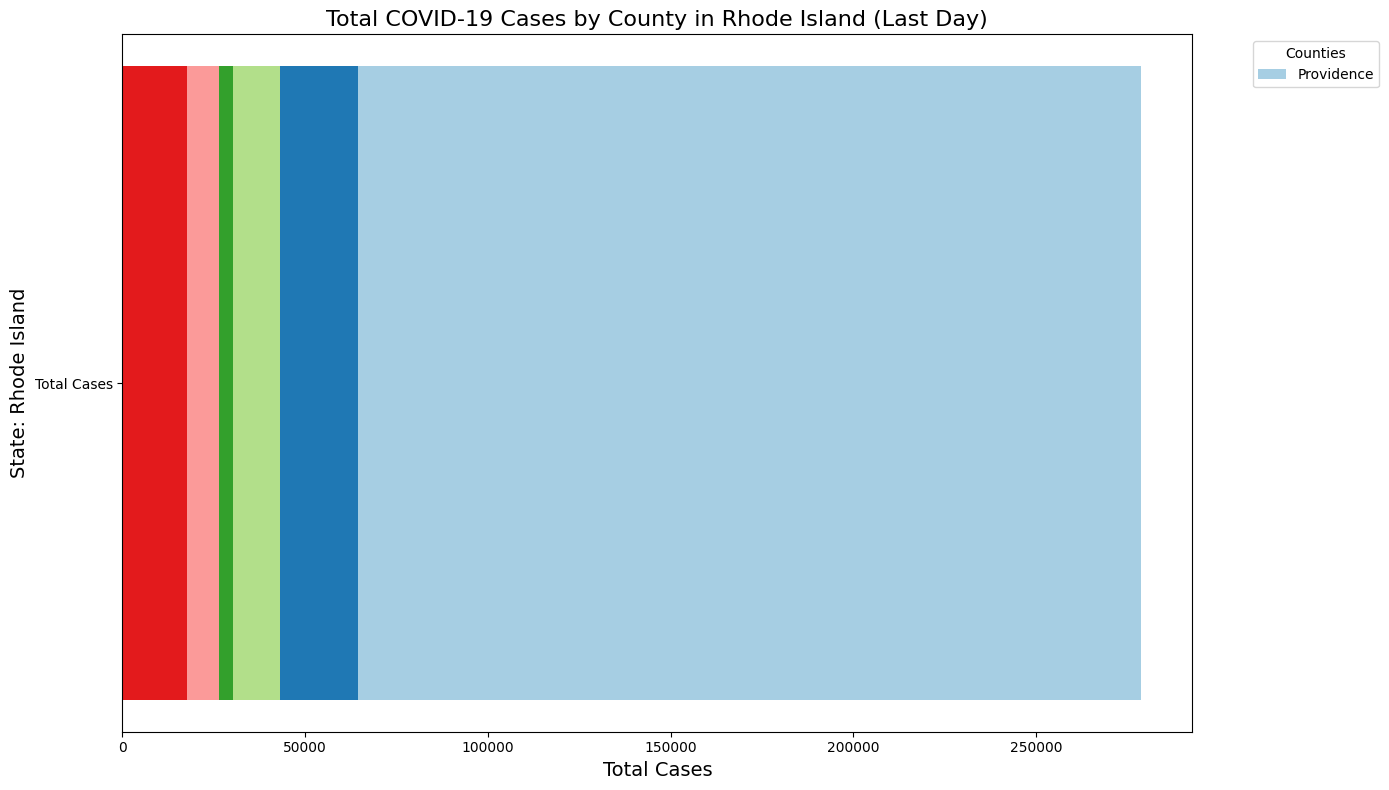

In [75]:
#%% viz 4
'''
Create a visualization that shows a stacked bar chart of county contributions
to a given state's total cases. You may choose any state (or states).
The graphic should:
-Have a single column delineate a state
-Have each 'slice' or column compontent represent a county
'''

#Filter data for a specific state
state_name = 'Rhode Island'
state_df = covid_df[covid_df['Province_State'] == state_name]

#Identify the date columns
date_columns = covid_df.columns[10:]

#Extract the relevant data for the most recent date
last_day_data = state_df[date_columns].iloc[:, -1]  

#Set the index to be the county names
last_day_data.index = state_df['Admin2']

#Sort counties in descending order by their number of cases 
last_day_data = last_day_data.sort_values(ascending=False)

#Plotting the stacked bar chart by the total cases on the last day
plt.figure(figsize=(14, 8))

#Create a single stacked bar chart where counties are stacked in the bar
plt.barh(['Total Cases'], last_day_data, color=plt.cm.Paired.colors[:len(last_day_data)])

#Title and labels
plt.title(f'Total COVID-19 Cases by County in {state_name} (Last Day)', fontsize=16)
plt.xlabel('Total Cases', fontsize=14)
plt.ylabel('State: ' + state_name, fontsize=14)

#Show county names as the legend for each "slice"
plt.legend(last_day_data.index, title="Counties", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

#Show the plot
plt.tight_layout()
plt.show()